### JDF - boundary condition analysis and transports

## LEADING QUESTIONS:

    - when does most of the carbon transport happen?
    - does DIC transport follow salinity transport?
    - what is the interannual variability here?
    

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
import warnings
warnings.filterwarnings('ignore') 

In [21]:
import netCDF4 as nc
import matplotlib
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

plt.rcParams.update({'font.size': 14})

# import mpl_interactions.ipyplot as iplt
# from mpl_interactions import indexer
# %matplotlib ipympl

## Visualize where transports are output in the model

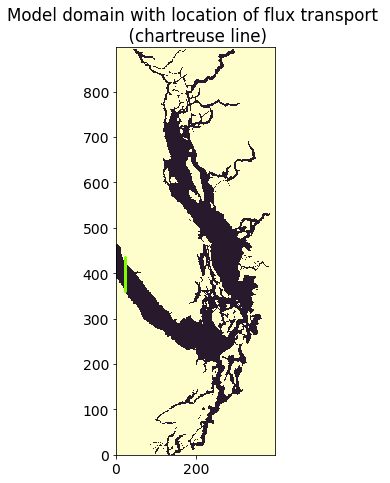

In [22]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.5
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

## [A] Summer and winter transport magnitudes in property space

these are anomalies - eg. transport of [DIC-2050] and [sal-30.0]

depth of x: 24.10025665445164


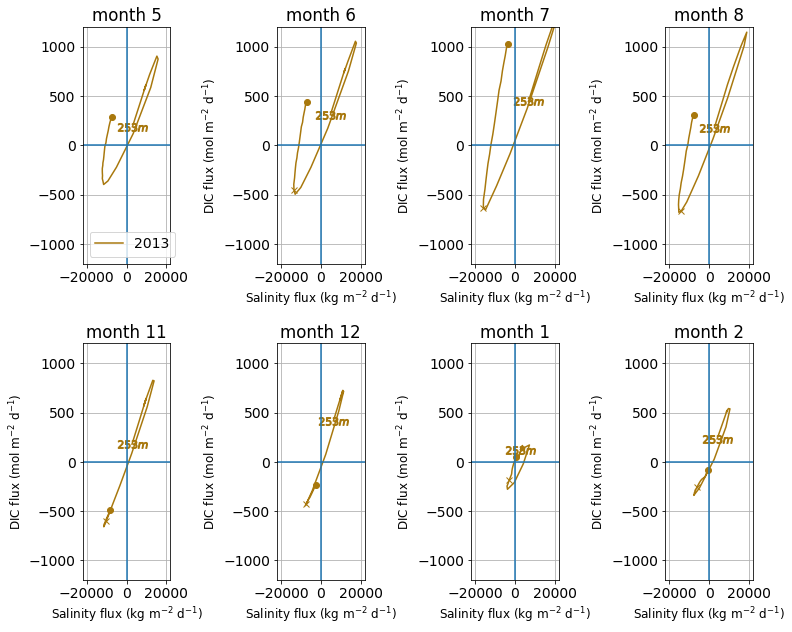

In [23]:
txmi = -2.2e4; txma = 2.2e4
tymi = -1.2e3; tyma = 1.2e3
tcmap = cm.cm.phase
sal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomsal_flux_stor_conc.pkl', 'rb'))  
DIC_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomDIC_2050_flux_stor_conc.pkl', 'rb'))  

months = [5,6,7,8,11,12,1,2]

## one year
fact = 0.3
fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.21)
axs = axs.ravel()

for i in range(1):
    for y in range(0,1):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7), label = f'{y+2013}')
        axs[i].legend()
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].grid()
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_xlim([txmi,txma])
    axs[i].set_ylim([tymi,tyma])

td = 20
print(f'depth of x: {depths[td]}')
for i in range(1,8):
    for y in range(0,1):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,td,months[i]-1],\
                     DIC_flux_stor_conc[y,td,months[i]-1], marker = 'x', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])
    axs[i].set_xlabel("Salinity flux (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].set_ylabel("DIC flux (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].grid()
plt.tight_layout()

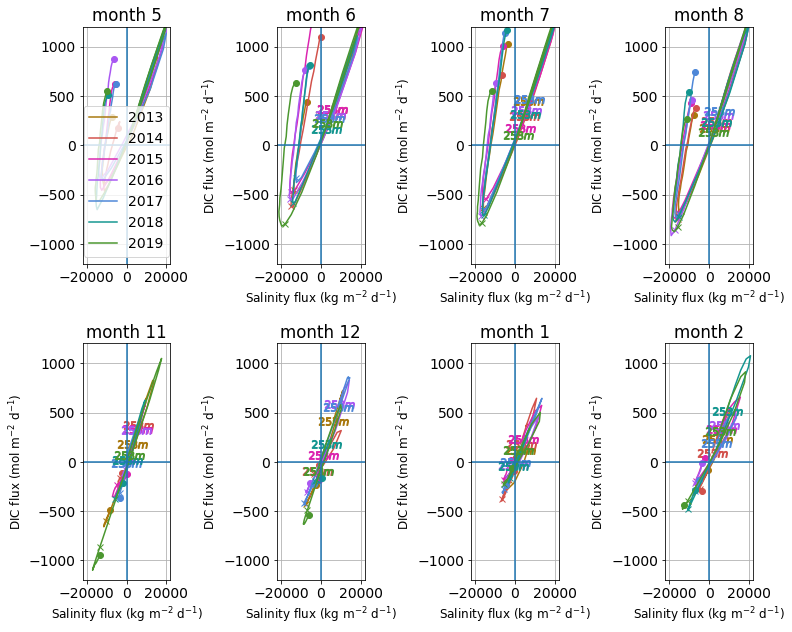

In [24]:
# txmi = -5e5; txma = 5e5
# tymi = -3e4; tyma = 3e4
months = [5,6,7,8,11,12,1,2]

## one year
fact = 0.3
fig, axs = plt.subplots(2,4, figsize=(11, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.21)
axs = axs.ravel()

for i in range(1):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7), label = f'{y+2013}')
        axs[i].legend()
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
    axs[i].grid()
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])

for i in range(1,8):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,months[i]-1],\
                     DIC_flux_stor_conc[y,:,months[i]-1], color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,0,months[i]-1],\
                     DIC_flux_stor_conc[y,0,months[i]-1], marker = 'o', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,td,months[i]-1],\
                     DIC_flux_stor_conc[y,td,months[i]-1], marker = 'x', color = tcmap(y/7))
        axs[i].plot(sal_flux_stor_conc[y,32,months[i]-1],\
                     DIC_flux_stor_conc[y,32,months[i]-1], marker = "$253m$", markersize = 30,\
                    color = tcmap(y/7))
    axs[i].set_title(f'month {months[i]}')
    axs[i].set_xlim([txmi,txma]); axs[i].axvline(x=0); axs[i].axhline(y=0)
    axs[i].set_ylim([tymi,tyma])
    axs[i].set_xlabel("Salinity flux (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].set_ylabel("DIC flux (mol m$^{-2}$ d$^{-1}$)", fontsize=12)
    axs[i].grid()
plt.tight_layout()

## [B] Monthly transport magnitudes as depth profiles

    - in winter, flux changes direction a bit below 50m, in summer, this is almost always around 50m
    - always a tendency for highest flux in between 100-150 meters, months 6-8
    - highest flux out also in these months (typically month 7-8)

Text(0.5, 1.05, 'DIC fluxes')

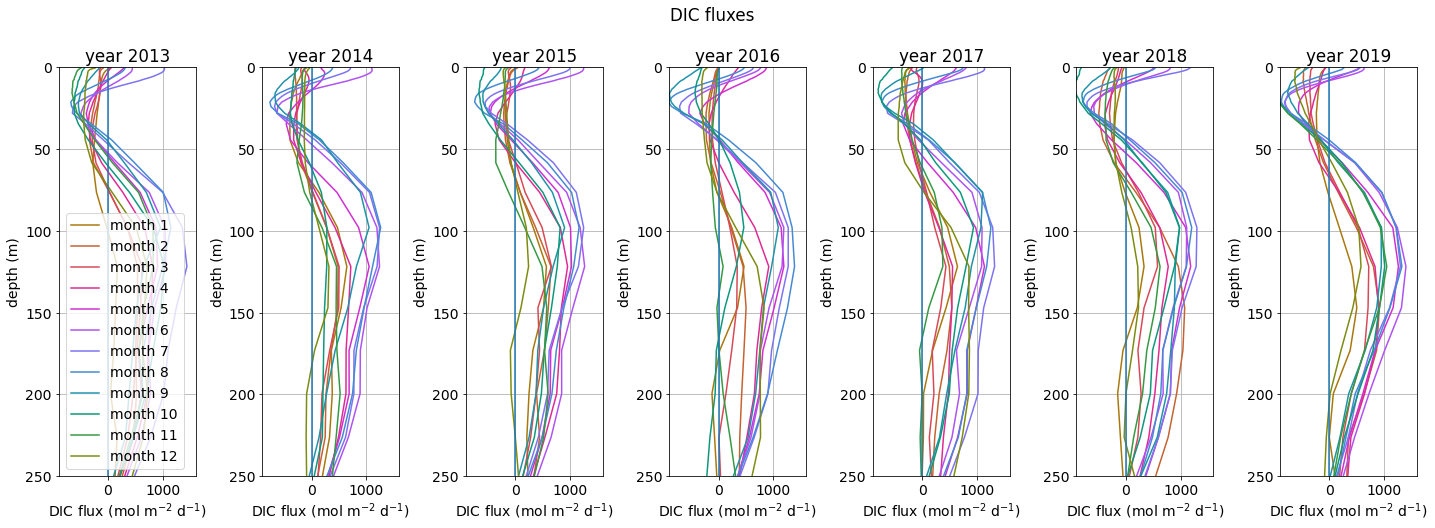

In [25]:
txmi = -9e2; txma = 1.6e3
fig, axs = plt.subplots(1,7, figsize=(20, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()
for y in range(0,7):
    for i in range(0,12):

        axs[y].plot(DIC_flux_stor_conc[y,:,i],depths, color = tcmap(i/12),label = f'month {i+1}')
    axs[y].set_ylim([0,250]); axs[y].invert_yaxis(); 
    axs[y].axvline(x=0); axs[y].grid();    
    axs[y].set_xlim([txmi,txma]); axs[y].set_title(f'year {y+2013}')
    axs[y].set_xlabel("DIC flux (mol m$^{-2}$ d$^{-1}$)")
    axs[y].set_ylabel('depth (m)')
axs[0].legend()
plt.tight_layout()
plt.suptitle('DIC fluxes', y = 1.05)


## DIC fluxes by month, along with salinity fluxes, and DIC/salinity flux ratio

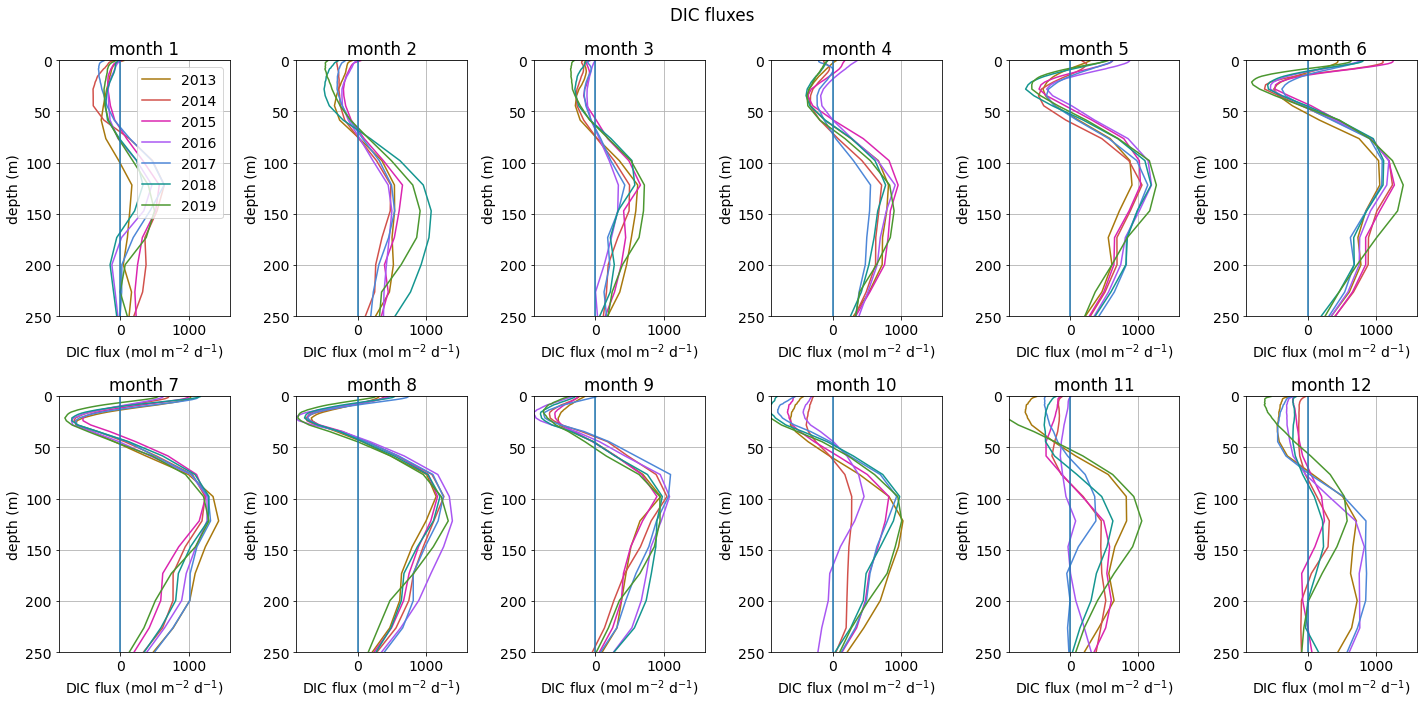

In [26]:
# txmi = -3e4; txma = 3e4
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fig, axs = plt.subplots(2,6, figsize=(20, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(DIC_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("DIC flux (mol m$^{-2}$ d$^{-1}$)")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('DIC fluxes')
plt.tight_layout()

### salinity fluxes and DIC fluxes are well-linked

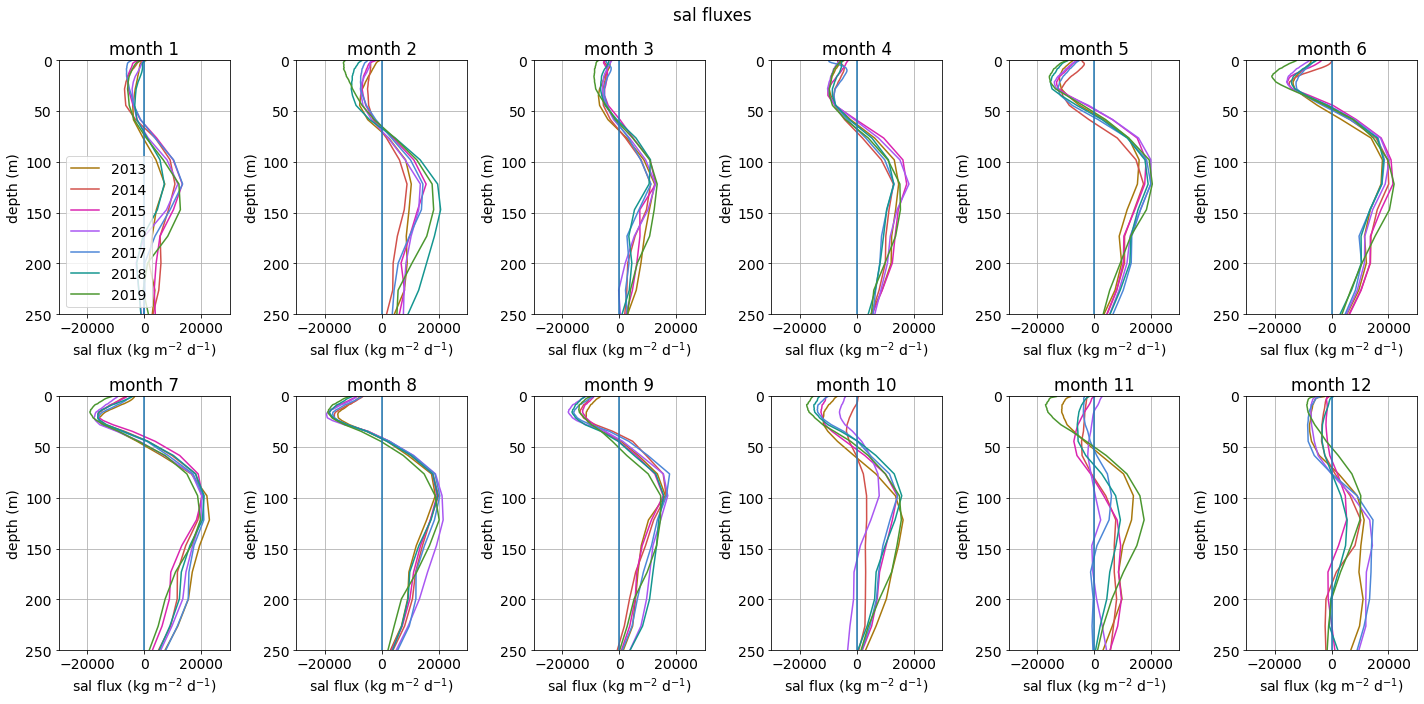

In [27]:
txmi = -3e4; txma =3e4
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fig, axs = plt.subplots(2,6, figsize=(20, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("sal flux (kg m$^{-2}$ d$^{-1}$)")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('sal fluxes')
plt.tight_layout()